## Observations and Insights 

In [402]:
#this magic code makes plots interactive and updatable.
%matplotlib inLine

In [403]:
# Dependencies and Setup, some of these are custom for increased visibility of the graphs and plots.
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import scipy.stats as sts
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_formats =['retina']
plt.rc('lines', linewidth=1)
rcParams['figure.figsize'] = 10,8


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [404]:
# Combine the data into a single dataset
mouse_mrgd = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
#A little name change cleanup
mouse_mrgd = mouse_mrgd.rename(columns = {'Weight (g)':'Weight_g'})
mouse_mrgd = mouse_mrgd.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume_mm3'})
mouse_mrgd = mouse_mrgd.rename(columns = {'Mouse ID':'mouse_id'})



# Display the data table for preview
mouse_mrgd

,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [405]:
# Checking the number of mice.
mouse_total = len(mouse_mrgd['mouse_id'].unique())
mouse_total

249

In [406]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_mrgd.loc[mouse_mrgd.duplicated(subset=['mouse_id', 'Timepoint'], keep=False)]


,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [407]:
# Optional: Get all the data for the duplicate mouse ID. 

In [408]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_clean = mouse_mrgd.loc[mouse_mrgd.mouse_id != 'g989']
mouse_clean    


,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [409]:
#I'm visually validating the removal of mouse (g989) rows.
mouse_clean.loc[907:919]

,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
907,g867,Stelasyn,Female,9,25,15,51.060419,1


In [410]:
# Checking the number of mice in the clean DataFrame.
mice_afterDrop = mouse_clean['mouse_id'].nunique()
mice_afterDrop

248

## Summary Statistics

In [411]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [412]:
#perform groupby to get the tumor info on each drug Regimen
summary_stats = mouse_clean.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.rename(columns = {'mean':'Mean Tumor Volume', 
                                'median':'Median Tumor Volume', 
                                'var':'Tumor Volume Variance', 
                                'std':'Tumor Volume Std. Dev.', 
                                'sem':'Tumor Volume Std. Err.'
                               }, inplace=True)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [413]:
# This method produces everything in a single groupby function
summary_straight = mouse_clean.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_straight

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [414]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

In [415]:
mice_treatment = mouse_clean.groupby("Drug Regimen")["mouse_id"].count().sort_values(ascending=False)

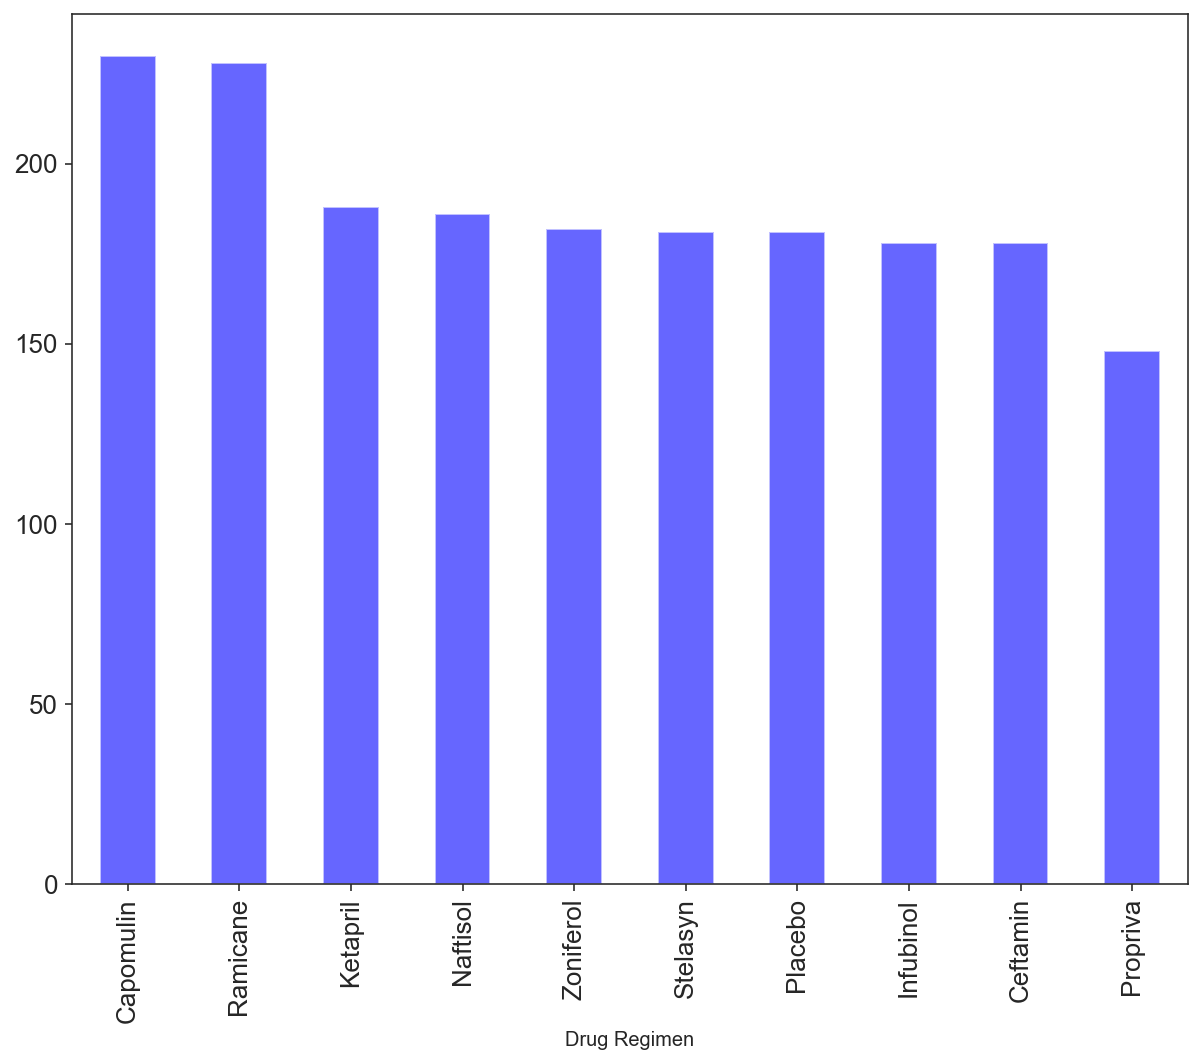

In [416]:
mice_treatment.plot(kind="bar", color="b", align="center", fontsize=13, alpha=0.6);

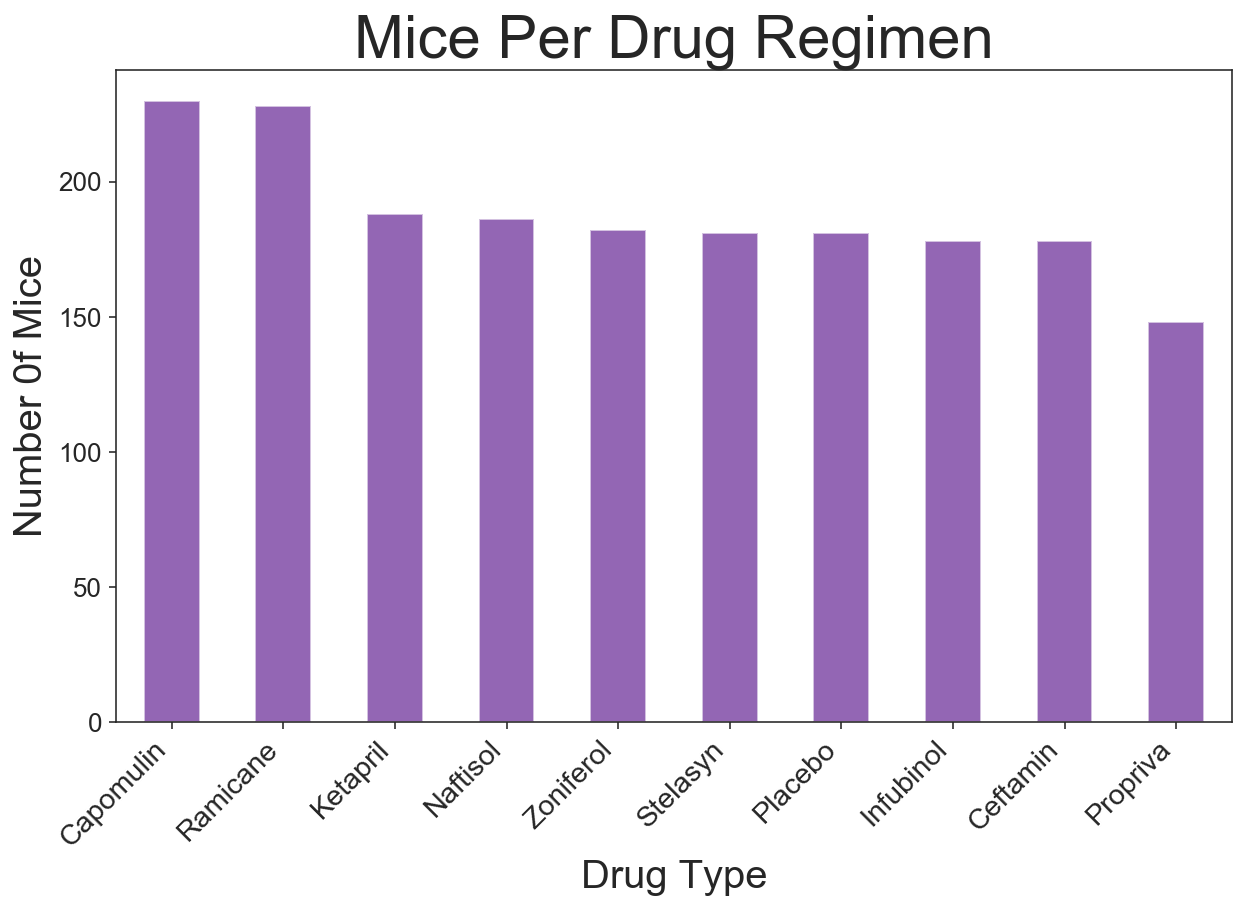

In [417]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
ax = mice_treatment.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13, alpha=0.6, rot=45);
#ax.set_alpha(0.9)
ax.set_title("Mice Per Drug Regimen", fontsize=30)
ax.set_ylabel("Number 0f Mice", fontsize=20)
ax.set_xlabel("Drug Type", fontsize=20);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
#fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig("Images/Mice_Per_Regimen.png", bbox_inches = 'tight', dpi=100)


In [418]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

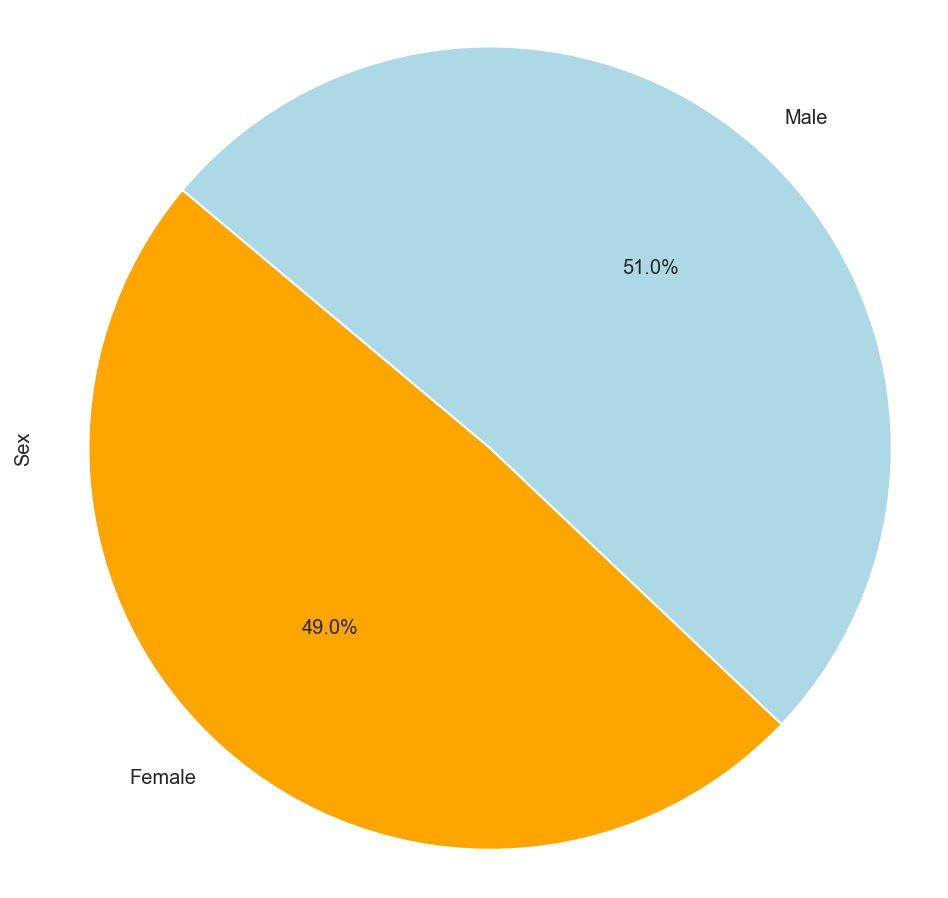

In [419]:
pandas_pie = mouse_clean.groupby('Sex')['Sex'].agg('count')
colors = ["orange", "lightblue"]
#.plot(kind='pie', subplots=False, title='Female vs Male Count');
pandas_pie.plot(kind='pie', subplots=True, colors=colors, autopct="%1.1f%%", startangle=140, figsize=(8, 8));
plt.axis("equal")
plt.show;                                      

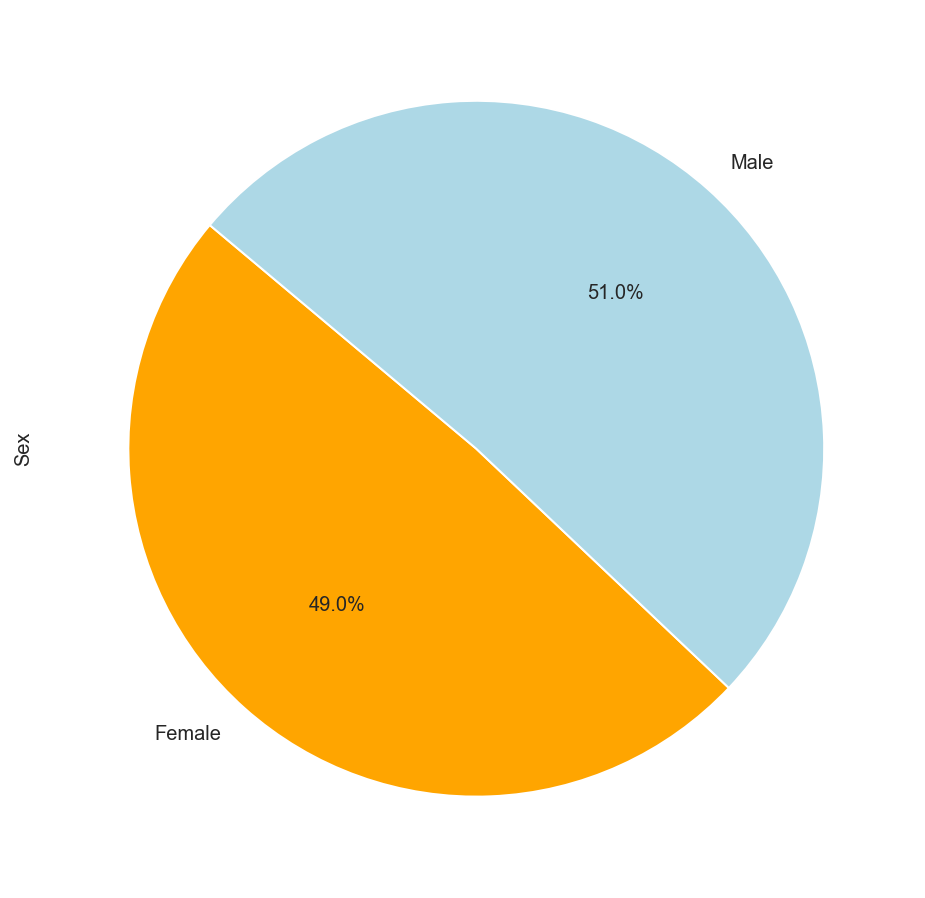

In [420]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = ["Female", "Male"]
colors = ["orange", "lightblue"]
sexes = mouse_clean.groupby('Sex')['Sex'].agg('count')

# Tell matplotlib to create a pie chart based upon the above data
plt.ylabel("Sex")
plt.pie(sexes, labels=mice, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [421]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#cleanup rename Drug Regimen for easier parsing
mouse_clean = mouse_clean.rename(columns = {'Drug Regimen':'drug_regimen'})

In [422]:
selected_drugs = mouse_clean[mouse_clean["drug_regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
selected_drugs

,mouse_id,drug_regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [423]:
selected_drugs = selected_drugs.sort_values('Timepoint', ascending=False).drop_duplicates('mouse_id').sort_index()

selected_drugs_data = selected_drugs[["drug_regimen", "mouse_id", "Timepoint", "Tumor_Volume_mm3"]]

In [424]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_sel_tumor = selected_drugs_data.groupby("mouse_id").max()
mouse_tumor_by = pd.merge(selected_drugs_data, drug_sel_tumor, how="left", on=["mouse_id", "mouse_id"])
mouse_tumor_by

,drug_regimen_x,mouse_id,Timepoint_x,Tumor_Volume_mm3_x,drug_regimen_y,Timepoint_y,Tumor_Volume_mm3_y
0,Ramicane,k403,45,22.050126,Ramicane,45,22.050126
1,Capomulin,s185,45,23.343598,Capomulin,45,23.343598
2,Capomulin,x401,45,28.484033,Capomulin,45,28.484033
3,Capomulin,m601,45,28.430964,Capomulin,45,28.430964
4,Ramicane,g791,45,29.128472,Ramicane,45,29.128472
...,...,...,...,...,...,...,...
95,Ceftamin,x822,45,61.386660,Ceftamin,45,61.386660
96,Infubinol,y163,45,67.685569,Infubinol,45,67.685569
97,Ceftamin,y769,45,68.594745,Ceftamin,45,68.594745
98,Ceftamin,y865,45,64.729837,Ceftamin,45,64.729837


In [425]:
mouse_tumor_by = mouse_tumor_by.rename(columns = {'Timepoint_y':'last_timepoint'})
mouse_tumor_by = mouse_tumor_by.rename(columns = {'Tumor_Volume_mm3_y':'final_tumor_size'})
mouse_tumor_by = mouse_tumor_by.rename(columns = {'drug_regimen_x':'drug_regimen'})
mouse_tumor_by.drop('drug_regimen_y', axis=1, inplace=True)
mouse_tumor_by.drop('Timepoint_x', axis=1, inplace=True)
mouse_tumor_by.drop('Tumor_Volume_mm3_x', axis=1, inplace=True)
mouse_tumor_by

,drug_regimen,mouse_id,last_timepoint,final_tumor_size
0,Ramicane,k403,45,22.050126
1,Capomulin,s185,45,23.343598
2,Capomulin,x401,45,28.484033
3,Capomulin,m601,45,28.430964
4,Ramicane,g791,45,29.128472
...,...,...,...,...
95,Ceftamin,x822,45,61.386660
96,Infubinol,y163,45,67.685569
97,Ceftamin,y769,45,68.594745
98,Ceftamin,y865,45,64.729837


In [426]:
# Put treatments into a list for for loop (and later for plot labels)
just_drugs = selected_drugs_data.drop_duplicates(subset=['drug_regimen'])
drugs = []
for index, row in just_drugs.iterrows():
    drugs.append(row[0])  
drugs

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

In [427]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for index, row in mouse_tumor_by.iterrows():
    tumor_vol.append(row[3])


In [428]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
quartiles = mouse_tumor_by.quantile([.25,.5,.75])

In [429]:
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Mice Tumors is: {lowerq}")
print(f"The upper quartile of Mice Tumors is: {upperq}")
print(f"The interquartile range of Mice Tumors is: {iqr}")
print(f"The the median of Mice Tumors is: {quartiles.loc[0.5]} ")
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Mice Tumors is: last_timepoint      30.000000
final_tumor_size    37.187744
Name: 0.25, dtype: float64
The upper quartile of Mice Tumors is: last_timepoint      45.000000
final_tumor_size    59.930262
Name: 0.75, dtype: float64
The interquartile range of Mice Tumors is: last_timepoint      15.000000
final_tumor_size    22.742518
dtype: float64
The the median of Mice Tumors is: last_timepoint      45.0
final_tumor_size    45.0
Name: 0.5, dtype: float64 
Values below last_timepoint      7.500000
final_tumor_size    3.073967
dtype: float64 could be outliers.
Values above last_timepoint      67.500000
final_tumor_size    94.044039
dtype: float64 could be outliers.


In [430]:
mouse_tumor_by_sort = mouse_tumor_by.groupby(['drug_regimen', 'mouse_id']).last()['final_tumor_size']
mouse_tumor_by_sort.head()

# Turn retrieved data into dataframe to easily manipulate
mouse_tumor_by_df = mouse_tumor_by_sort.to_frame()

In [431]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_mouse= mouse_tumor_by_df.reset_index()
tumor_lists = final_tumor_mouse.groupby('drug_regimen')['final_tumor_size'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)

In [432]:
tumor_list_df = tumor_list_df.reindex(drugs)

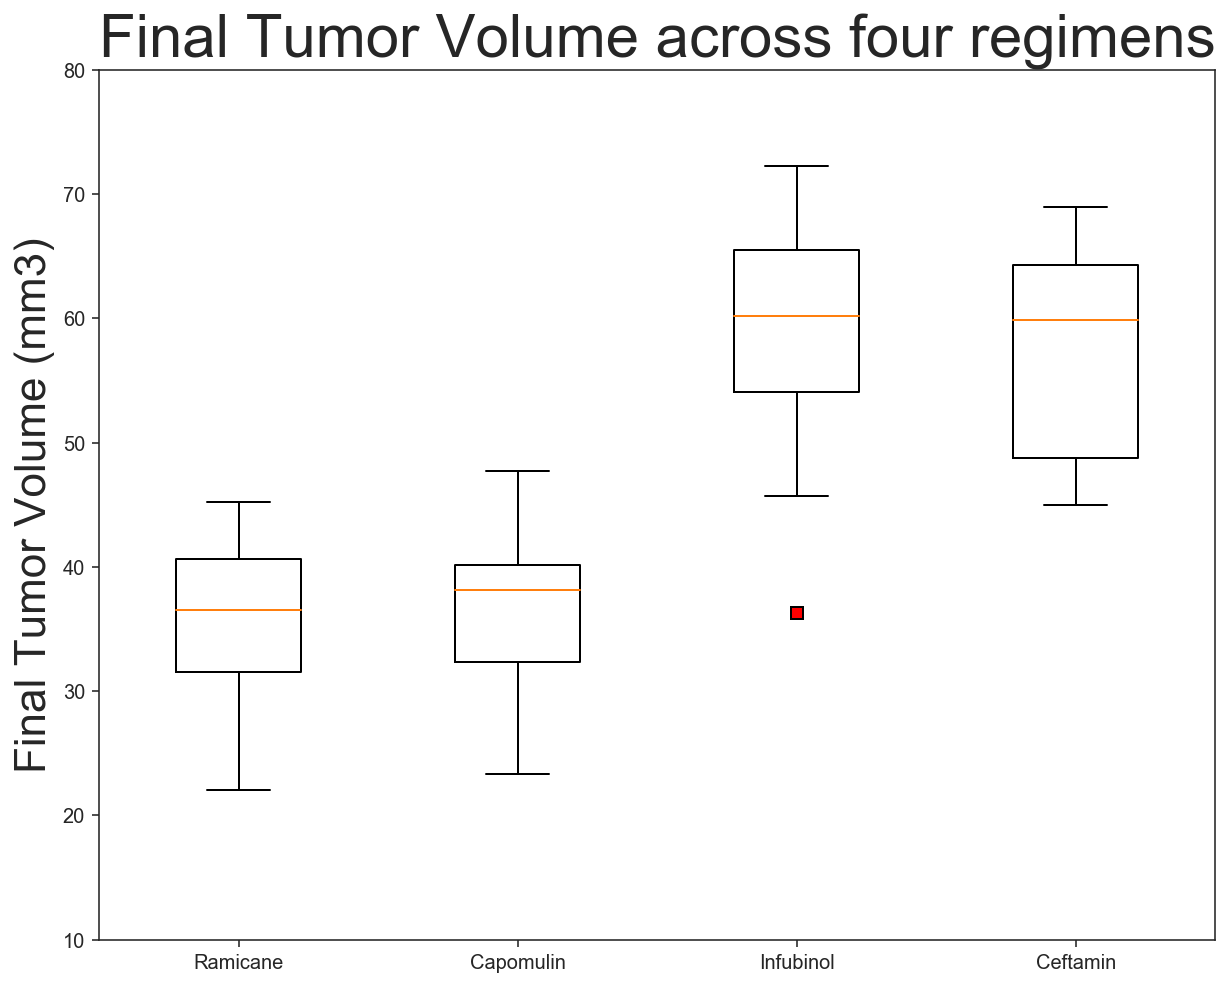

In [433]:
tumor_volumes = [vol for vol in tumor_list_df['final_tumor_size']]
red_square = dict(markerfacecolor='r', marker='s')
plt.title("Final Tumor Volume across four regimens", fontsize=30)
plt.ylabel("Final Tumor Volume (mm3)", fontsize=22)
plt.boxplot(tumor_volumes, labels=drugs, flierprops=red_square)
plt.ylim(10, 80)
#fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig("Images/Final_Tumor_Regimen.png", dpi=100)

## Line and Scatter Plots

In [434]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_vol = mouse_clean[mouse_clean["mouse_id"].isin(["g316"])]

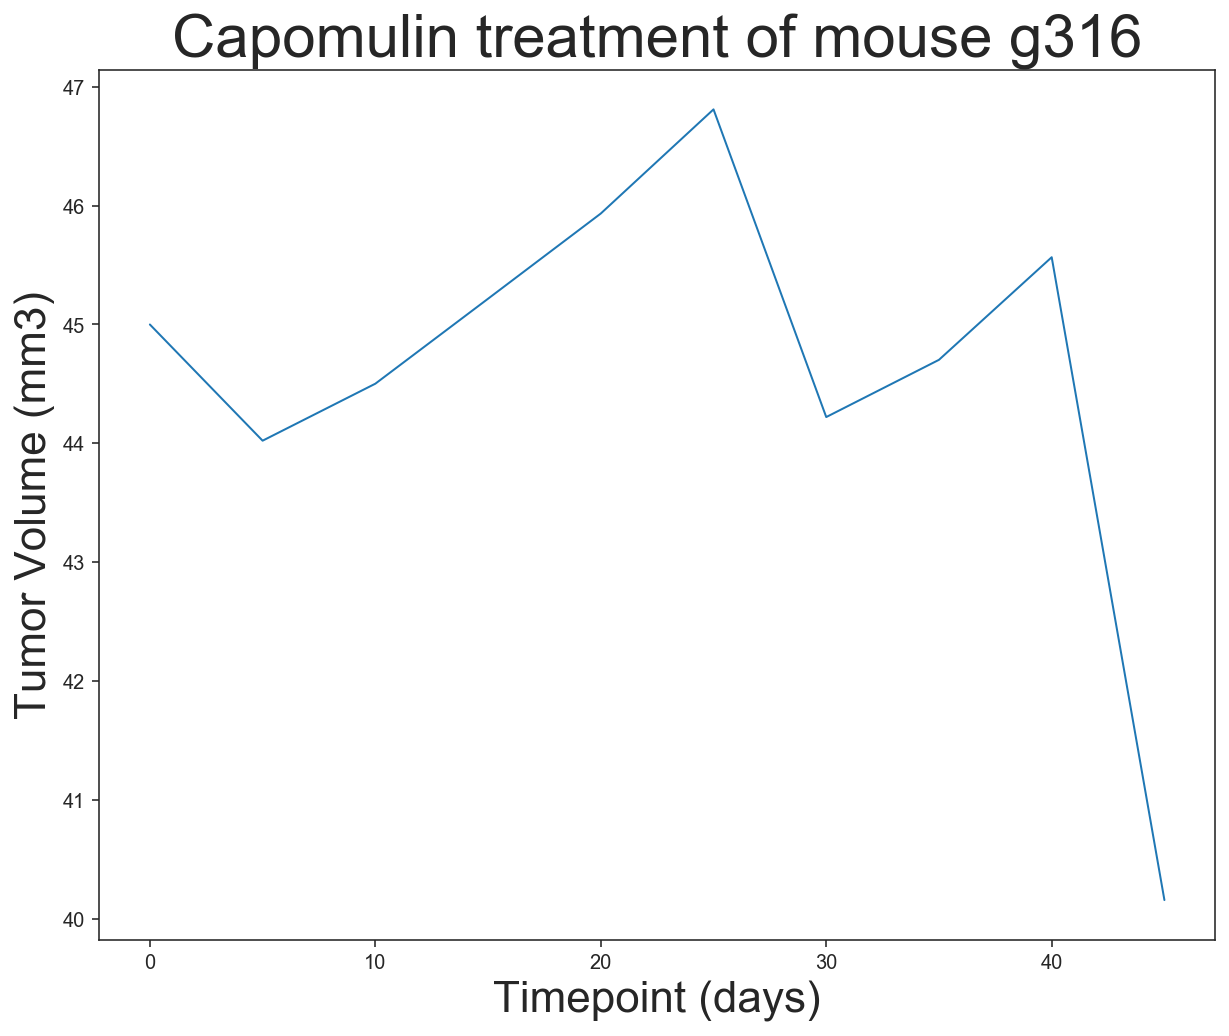

In [435]:
x_axis = []
for i in time_vs_vol.Timepoint:
    x_axis.append(i)

e_x = []
for i in time_vs_vol.Tumor_Volume_mm3:
    e_x.append(i)
plt.title("Capomulin treatment of mouse g316", fontsize=30)
plt.xlabel("Timepoint (days)", fontsize=22)
plt.ylabel("Tumor Volume (mm3)", fontsize=22)
plt.plot(x_axis, e_x)
plt.show()

In [436]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# USE df selected_drugs?
capomulin_selected = selected_drugs[selected_drugs["drug_regimen"].isin(["Capomulin"])]

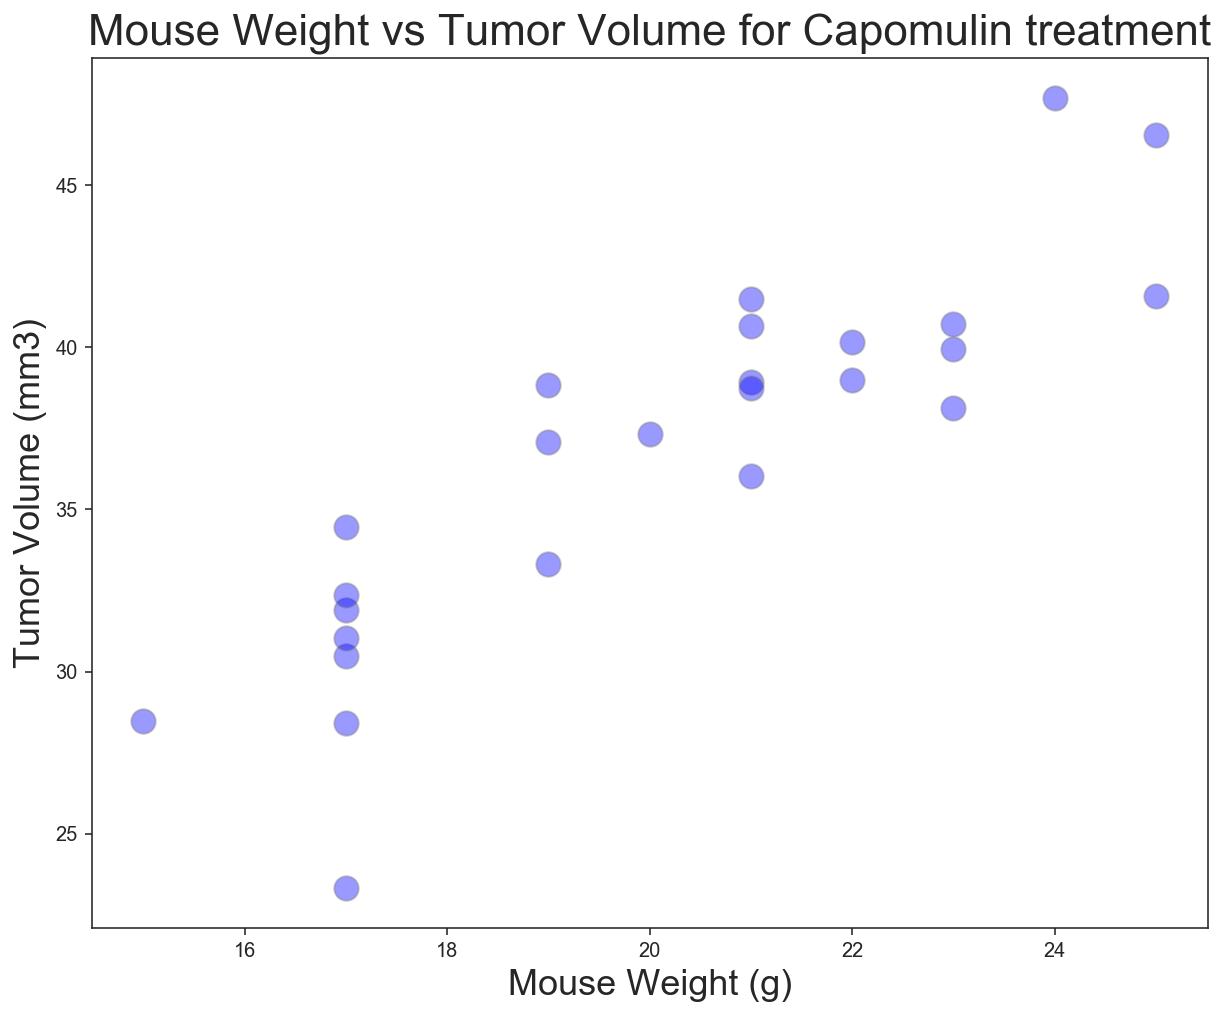

In [437]:
plt.title("Mouse Weight vs Tumor Volume for Capomulin treatment", fontsize=22)
plt.xlabel("Mouse Weight (g)", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
plt.scatter(capomulin_selected.Weight_g, capomulin_selected.Tumor_Volume_mm3,
            marker="o", s=150, facecolors="blue", edgecolors="grey", alpha=0.4)
plt.show()

## Correlation and Regression

In [438]:
# Calculate the correlation coefficient and linear regression model 

In [439]:
wieght = capomulin_selected.iloc[:,4]
tumor_vol = capomulin_selected.iloc[:,6]
correlation = sts.pearsonr(wieght,tumor_vol)

In [440]:
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

In [441]:
#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

The correlation between mouse weight 
and average tumor volume is 0.88


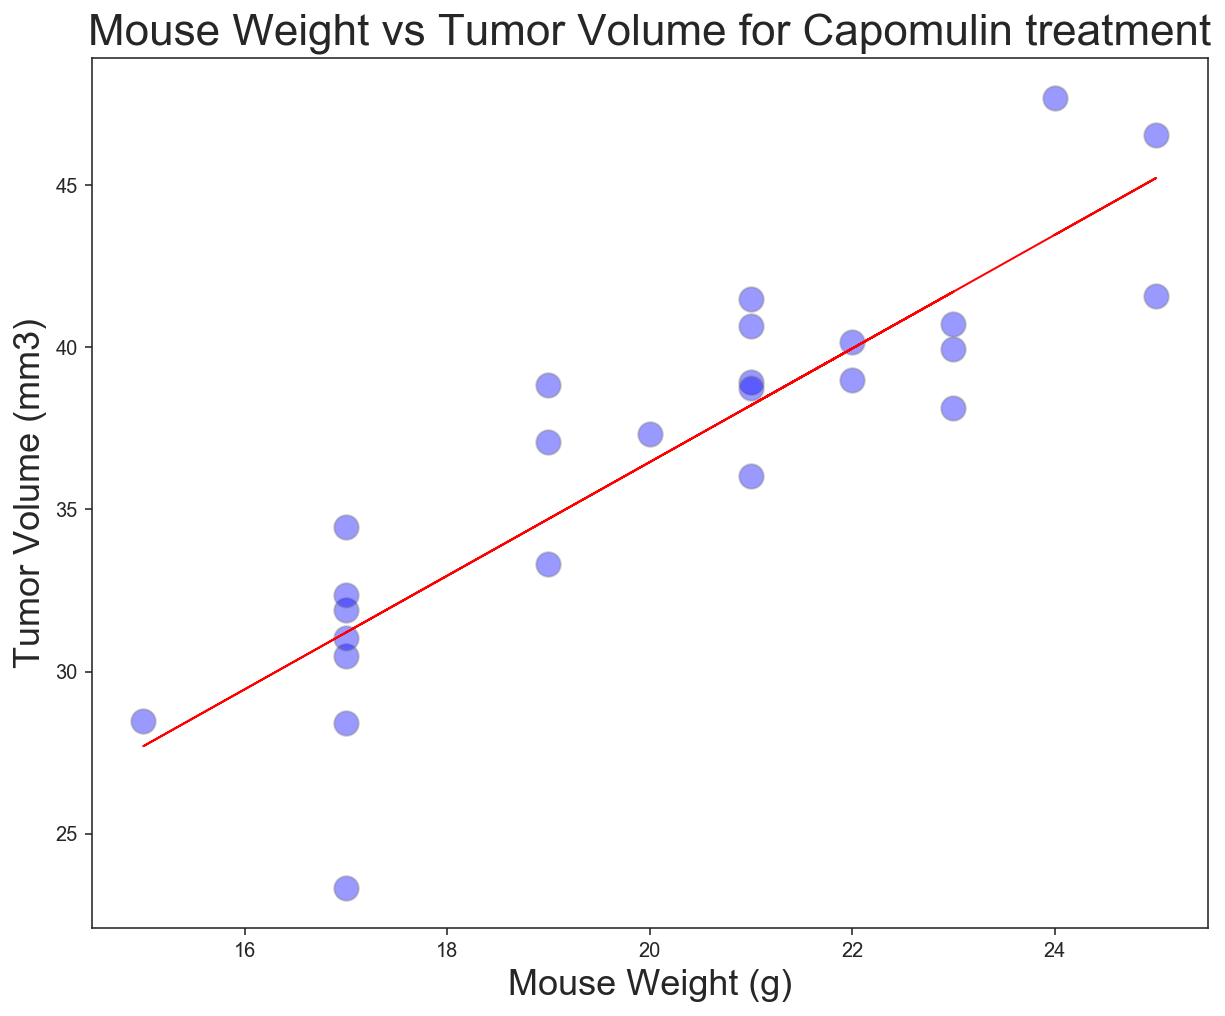

<Figure size 720x576 with 0 Axes>

In [448]:
x_values = capomulin_selected['Weight_g']
y_values = capomulin_selected['Tumor_Volume_mm3']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Mouse Weight vs Tumor Volume for Capomulin treatment", fontsize=22)
plt.xlabel("Mouse Weight (g)", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
#plt.tight_layout()
plt.scatter(x_values,y_values, marker="o", s=150, facecolors="blue", edgecolors="grey", alpha=0.4)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The correlation between mouse weight {nreturn}and average tumor volume is {round(correlation[0],2)}")

#fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig("Images/MouseWeightTumor.png", bbox_inches = 'tight', dpi=100)

<Figure size 720x576 with 0 Axes>